In [ ]:
# https://www.youtube.com/watch?v=exaWOE8jvy8&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4

# PyTorch Tensors

In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.empty(1)
# like scaler value
x

In [ ]:
x = torch.empty(3)
# 1D vector with 3 elem
x

In [ ]:
# tensor with random value
x = torch.rand(2,2)
x

## Tensors Data type

In [ ]:
x = torch.ones(2,2)
# print datatype
x.dtype

In [ ]:
x = torch.ones(2,2, dtype=torch.double)
# print datatype
x.dtype

## Tensors Size

In [ ]:
x = torch.tensor([[2.5, 0.1], [2.5, 0.1]])
print(x)
print(x.size())

## Tensor Operations

In [ ]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

z = x + y
z

In [ ]:
z = torch.add(x, y)
z

In [ ]:
# inplace addition
# every function that has "_" will do inplace operation
y.add_(x)
y

In [ ]:
# slicing
print(x)
print(x[:, 0])

In [ ]:
print(x[1, :])

In [ ]:
print(x[1,1])
# will give actual value
# only if one element in tensor
print(x[1, 1].item())

### Reshape Tensor

In [ ]:
x = torch.rand(4, 4)
print(x)
# 1D with 16 elem
print(x.view(16))

In [ ]:
x = torch.rand(4, 4)
print(x)
# 2D with not specifing num of rows with 01
# but giving num of elements in a row that is 8
print(x.view(-1, 8))

### Tensor to numpy arr

In [ ]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(type(b))

In [ ]:
# both numpy array and tensor will share same memory location if tensor is on CPU not on GPU

# broadcast so adds 1 to each element
a.add_(1)
print(a)
print(b)

### Send tensor to GPU

In [ ]:
# check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")

    # will create tensor in GPU
    x = torch.ones(5, device=device)

    # create first and then move it to GPU
    y = torch.ones(5)
    y = y.to(device)

    # will be performed on GPU
    z = x + y

    # will give error
    # cause numpy can only handle CPU array
    # so has to send it to CPU first
    # z.numpy()

    # send z to cpu
    z = z.to("cpu")
    print(z.numpy())

### Calculate Gradient of Tensor

In [ ]:
# To tell pytorch that u have to calculate graident of tensor during optimization step

x = torch.ones(5, requires_grad = True)
print(x)

# AutoGrad

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad=True)

# each operation will creare a computation graph
# which will be used for calcuating grad
# since we set required_grad to true
y = x + 2
z = y * y * 2
z = z.mean()

# can only be called on required_grad set to true
# uses vector jacobain product to get the derivatives
# also called chain rule
# since z is scaler value backward func doest takes any argument
z.backward() # calc dz/dx
x.grad

In [ ]:
x = torch.randn(3, requires_grad=True)

# each operation will creare a computation graph
# which will be used for calcuating grad
# since we set required_grad to true
y = x + 2
z = y * y * 2
# z = z.mean()

# can only be called on required_grad set to true
# uses vector jacobain product to get the derivatives
# also called chain rule
# now z isnt scaler value anymore so need to pass some argument to backward func
# v has to be same size as z
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)

z.backward(v) # calc dz/dx
x.grad

## Prevent Gradient Tracking for some operations/tensor

In [ ]:
# prevent tracking gradient
# like operation updating weights should be used when calculating grad

# multiple ways to do same thing
# x.requires_grad_(False)

# this will create a new tensor
# x.detach()

# wrap operation in following with
# with torch.no_grad():

x = torch.randn(3, requires_grad=True)
print(x)

with torch.no_grad():
    y = x + 2
    # no grad attribute
    print(y)

## Training Example

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()

    model_output.backward()
    print(weights.grad)

    # empty gradient
    # very important
    weights.grad.zero_()

# Backpropogation

In [ ]:
import torch

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

# forward pass
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass

# Gradient Descent

## Gradient Descent from scratch

In [ ]:
import numpy as np

In [ ]:
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# Loss = 1 / N * (w*x - y_pred)**2
# dJ/dw = 1/N * 2x * (wx - y_pred)

# gradient
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

print(f"Prediciton before training f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # frwd pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if (epoch%1==0):
        print(f"epoch={epoch+1}, w={w:.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {forward(5):.3f}")

## Torch for Gradient Descent

In [ ]:
import torch

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# Loss = 1 / N * (w*x - y_pred)**2
# dJ/dw = 1/N * 2x * (wx - y_pred)

print(f"Prediciton before training f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # frwd pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # should not be part of gradient computation
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()
    
    if (epoch%10==0):
        print(f"epoch={epoch+1}, w={w:.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {forward(5):.3f}")

# Use model, loss, optimizer

## Steps of designing model
- design model inputs, outputs and forward pass
- construct loss and optimizer
- training loop
  - forward pass
  - backward pass
  - update weights
  - zero grad

In [ ]:
import torch
import torch.nn as nn

## Use loss and optimizer from pytorch

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

print(f"Prediciton before training f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

# loss
loss = nn.MSELoss()

# optimizer
# takes list of param to optimize
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # frwd pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # can be done by optimizer
    # this will do optimization step
    optimizer.step()

    # zero gradients
    # use optimizer to zero grad
    optimizer.zero_grad()
    
    if (epoch%10==0):
        print(f"epoch={epoch+1}, w={w:.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {forward(5):.3f}")

## Use model from pytorch instead of forward func

In [ ]:
# X must be 2D array, where each row is diff input
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

print(f"Prediciton before training f(5) = {model(X_test).item():.3f}")

# training
learning_rate = 0.01
n_iters = 1000

# loss
loss = nn.MSELoss()

# optimizer
# takes list of param to optimize
# model.parameters() gives list of optimizable param of model
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # frwd pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # can be done by optimizer
    # this will do optimization step
    optimizer.step()

    # zero gradients
    # use optimizer to zero grad
    optimizer.zero_grad()
    
    if (epoch%100==0):
        [w, b] = model.parameters()
        print(f"epoch={epoch+1}, w={w[0][0].item():.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {model(X_test).item():.3f}")

## Create custom model

In [ ]:
# X must be 2D array, where each row is diff input
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f"Prediciton before training f(5) = {model(X_test).item():.3f}")

# training
learning_rate = 0.01
n_iters = 1000

# loss
loss = nn.MSELoss()

# optimizer
# takes list of param to optimize
# model.parameters() gives list of optimizable param of model
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # frwd pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # can be done by optimizer
    # this will do optimization step
    optimizer.step()

    # zero gradients
    # use optimizer to zero grad
    optimizer.zero_grad()
    
    if (epoch%100==0):
        [w, b] = model.parameters()
        print(f"epoch={epoch+1}, w={w[0][0].item():.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {model(X_test).item():.3f}")

# Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

# create torch tensor from numpy
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
# has only one row, create 2D
Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(n_features, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, Y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if ((epoch+1)%10==0):
        print(f"epoch: {epoch+1}, loss={loss.item():.4f}")

# plot
# dont calc gradient for this operation
pred = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, "ro")
plt.plot(X_numpy, pred, "b")
plt.show()

# Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# prepare data
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

# features will have 0 mean
# and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create torch tensor from numpy
X_train = torch.from_numpy(X_train.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

# has only one row, create 2D
Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()

        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

n_samples, n_features = X_train.shape

# model
input_size = n_features
model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if ((epoch+1)%10==0):
        print(f"epoch: {epoch+1}, loss={loss.item():.4f}")

# no need to calc this as a part of gradient operation and add it to computation graph
with torch.no_grad():
    y_pred = model(X_test)
    # round to 0 or 1
    y_pred_cls = y_pred.round()
    
    acc = y_pred_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f"Accuracy = {acc:.4f}")

# Dataset and DatasetLoader

In [ ]:
# hard to train on entire dataset at once
# better to divide dataset in small batches
# then training loop will be like

# for epoch in range(1000):
#     for i in range(total_batches):
#         # train on that batch
#         x_batch, y_batch = ...

- **epoch:** 1 forward and backward pass of ALL training samples
- **batch_size:** number of training samples in one forward & backward pass
- **num of iterations:** number of passes, each pass using [batch_size] number of samples

e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

In [ ]:
!wget https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("/kaggle/working/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # create (n_samples, 1) size
        self.n_samples = xy.shape[0];

    def __getitem__(self, index):
        # allow us to use dataset[0]
        return (self.x[index], self.y[index])

    def __len__(self):
        # allow us to use len(dataset)
        return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

In [ ]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("/kaggle/working/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # create (n_samples, 1) size
        self.n_samples = xy.shape[0];

    def __getitem__(self, index):
        # allow us to use dataset[0]
        return (self.x[index], self.y[index])

    def __len__(self):
        # allow us to use len(dataset)
        return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

batch_size = 4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

# dummy training loop
num_epoch = 2
total_samples = len(dataset)
n_iter = math.ceil(total_samples / batch_size)

for epoch in range(num_epoch):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward update

        if (i+1)%5==0:
            print(f"epoch: {epoch+1}/{num_epoch}, step: {i+1}/{n_iter}")

In [ ]:
# build in dataset
# MNIST dataset
# torchvision.datasets.MNIST()
# fashion-mnist, cifar, coco 

# Dataset Transforms

In [ ]:
!wget https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

In [ ]:
dataset = torchvision.datasets.MNIST(root="./data", transform=torchvision.transforms.ToTensor(), download=True)

Has multiple already defined transforms

**On Images**
- CenterCrop, GrayScale, Pad, RandomAffine, RandomCrop
- RandomHorizontalFlip, RandomRotation, Resize, Scale

**On Tensors**
- LinearTransformation, Normalize, RandomErasing

**Conversion**
- ToPILImage
- ToTensor

**Generic**
- write lambdas

**Custom**
- create custom class

**Compose Multiple Transform**
```
composed = transforms.Compose([Rescale(256), RandomCrop(224)])
```

In [ ]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt("/kaggle/working/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)

        # note we didnt convert numpy arr to tensor
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        
        self.n_samples = xy.shape[0];

        self.transform = transform

    def __getitem__(self, index):
        # allow us to use dataset[0]
        sample = (self.x[index], self.y[index])

        # transform if transformation is there for dataset
        if (self.transform):
            sample = self.transform(sample)

        return sample
    
    def __len__(self):
        # allow us to use len(dataset)
        return self.n_samples

class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return (torch.from_numpy(inputs), torch.from_numpy(targets))

class MulTransform():
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        input, target = sample
        input *= self.factor
        return (input, target)

dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features, labels)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features, labels)
print(type(features), type(labels))

# Softmax and CrossEntropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
x = np.array([2.0, 1.0, 0.1])

# from scratch
def softmax(x):
    # converts continuous to probability values
    return np.exp(x) / np.sum(np.exp(x), axis=0)

outputs = softmax(x)
print(f"Softmax numpy: {outputs}")

# using torch
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)

In [ ]:
Y = np.array([1, 0, 0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

# from scratch
def crossEntropy(actual, predicted):
    # use as err for classification related task
    loss = -np.sum(actual*np.log(predicted))
    return loss # / float(predicted.shape[0])

l1 = crossEntropy(Y, Y_pred_good)
l2 = crossEntropy(Y, Y_pred_bad)
print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

# using torch
# CrossEntropyLoss already applies nn.LogSoftmax + nn.NLLLoss (negative log likelyhood loss)
# So, no softmax in last layer
# Y has class labels not one hot encoded
# Y_pred has raw scores (logits), no softmax
# 3 samples
Y = torch.tensor([2, 0, 1])
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.5, 2.0, 0.3], [0.5, 2.0, 0.3]])

loss = nn.CrossEntropyLoss();
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

# print actual class
_, pred1 = torch.max(Y_pred_good, 1)
_, pred2 = torch.max(Y_pred_bad, 1)
print(pred1)
print(pred2)

In [ ]:
# multiclass classification
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at end since using cross-entropy loss
        return out

model = NeuralNet(input_size = 28*28, hidden_size=5, output_size=3)
loss = nn.CrossEntropyLoss()

In [ ]:
# binary classification
# 1 output
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        # no softmax at end since using cross-entropy loss
        return out

model = NeuralNet2(input_size = 28*28, hidden_size=5)
loss = nn.BCELoss()

# Activation Functions

- **sigmoid:** last layer of binary classification
- **tanh:** hidden layers, same as convert continius data to prob for binaries
- **relu:** relu for hidden layers
- **leaky relu:**: better version of relu, tries to solve vanishing gradient problem

# Feed Forward Neural Network

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# hyper param
input_size = 28*28
hidden_size = 500
num_classes = 10

# training 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# import data
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)

# import data
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
examples = iter(train_loader)
samples, labels = next(examples)

print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

# send neural net to device
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape to flatten image
        # currenly (100, 1, 28, 28)
        # where 100 is num of samples in a batch, 1 is num of channels, 28 is image size
        # flatten would be (100, 784)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        l = loss(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        if ((i+1)%100==0):
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss={l.item():.4f}")

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"accuracy={acc}")

# Convulation Neural Network

- allow sharing of weights, across image space in location
- so that we can find if something is present anywhere in image
- pooling to extract high level features, like curves and all

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [ ]:
# dataset has PILImage of range [0, 1]
# we transform them to tensor of normalized range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                            download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 3 color channels, output channel size, kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        # kernel size 2, stride
        self.pool = nn.MaxPool2d(2, 2)
        # input channels equal to last channel size, output channel size, kernel size
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 16 channels and 2d square matrix of size 5
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if ((i+1)%100==0):
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}")

print('Finished Training')
# save trained model
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

# Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

In [ ]:
!unzip /kaggle/working/hymenoptera_data.zip

In [ ]:
# should have following file format
# data
# |-> train
# |     |->ants
# |     |->bees
# |->val
#     |->ants
#     |->bees

In [ ]:
# cuda:0 selects which GPU to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
data_dir = "/kaggle/working/hymenoptera_data"
sets = ["train", "val"]

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                 for x in sets}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [ ]:
class_names = image_datasets["train"].classes
print(class_names)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# get pretrained model
model = models.resnet18(pretrained=True)

In [ ]:
# change last fully connected layer
# get num of features in last fully connected layer
num_input_ftrs_last_layer = model.fc.in_features

# replace last layer to classify only 2 classes
model.fc = nn.Linear(num_input_ftrs_last_layer, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# scheduler
# to change learning rate
# every 7 epoch, learning rate is multiplied bu gamma
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

In [ ]:
# freeze some layer training, expect last layer
# change last fully connected layer
# get num of features in last fully connected layer
num_input_ftrs_last_layer = model.fc.in_features
for param in model.parameters():
    param.requires_grad = False

# replace last layer to classify only 2 classes
model.fc = nn.Linear(num_input_ftrs_last_layer, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# scheduler
# to change learning rate
# every 7 epoch, learning rate is multiplied bu gamma
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

# Save and Load Model

In [ ]:
import torch
import torch.nn as nn

```
PATH=""
model=""

# can save model or anything
# uses pickle to save
# saves complete model
# disadv: serialized is bound to specific classes
# and exact dir struct used when model is saved
torch.save(arg, PATH)

# model class must be defined somewhere
model = torch.load(PATH)
model.eval()

# better way/recommended
# use only for interference later
torch.save(model.state_dict(), PATH)

model = Model()
model.load_state_dict(torch.load(PATH))
# set model to evaluation mode
# this disables dropout layers, aleters batch noralization
model.eval()
```

In [ ]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)

In [ ]:
FILE = "model.pth"
torch.save(model, FILE)

In [ ]:
model = torch.load(FILE)
model.eval()

In [ ]:
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

In [ ]:
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()

In [ ]:
# can also save any state dict, like optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(optimizer.state_dict())

In [ ]:
checkpoint = {
    "epoch": 90,
    "model_states": model.state_dict(),
    "optim_state": optimizer.state_dict()
}

torch.save(checkpoint, "checkpoint.pth")

loaded_checkpoint = torch.load("checkpoint.pth")
epoch = loaded_checkpoint["epoch"]

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

model.load_state_dict(loaded_checkpoint["model_states"])
optimizer.load_state_dict(loaded_checkpoint["optim_state"])

In [ ]:
# if using CPU for training and loading in CPU then no change
# if using GPU for training and later uload it in cpu
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device("cpu")
model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH, map_location=device))

# if using GPU for trainign and load it in GPUdevice = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH))
model.to(device)

# Use model in API

In [ ]:
import io
import torch 
import torch.nn as nn 
import torchvision.transforms as transforms 
from PIL import Image

In [ ]:
# load model

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
model = NeuralNet(input_size, hidden_size, num_classes)

PATH = "app/mnist_ffn.pth"
#model.load_state_dict(torch.load(PATH))
model.eval()


In [ ]:
# image -> tensor
def transform_image(image_bytes):
    # transform image to match input image
    transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize((28,28)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,),(0.3081,))])
    # get image from bytes object
    image = Image.open(io.BytesIO(image_bytes))
    # append one extra dimension for batch 
    return transform(image).unsqueeze(0)

# predict
def get_prediction(image_tensor):
    # reshape to flatten image
    images = image_tensor.reshape(-1, 28*28)
    outputs = model(images)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    return predicted

# RNN
- allow prev output to be used as input while having hidden states
- so prev input influence current ouptut
- weights shared across time
- slow computation
- difficult to access info from long time
- can process input of any length

In [ ]:
!wget https://download.pytorch.org/tutorial/data.zip

In [ ]:
!unzip /kaggle/working/data.zip

In [ ]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 

In [ ]:
import io
import os
import unicodedata
import string
import glob
import random

In [ ]:
# alphabet small + capital letters + " .,;'"
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

def load_data():
    # Build the category_lines dictionary, a list of names per language
    category_lines = {}
    all_categories = []
    
    def find_files(path):
        return glob.glob(path)
    
    # Read a file and split into lines
    def read_lines(filename):
        lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
        return [unicode_to_ascii(line) for line in lines]
    
    for filename in find_files("/kaggle/working/data/*.txt"):
        category = os.path.splitext(os.path.basename(filename))[0]
        all_categories.append(category)
        
        lines = read_lines(filename)
        category_lines[category] = lines
        
    return category_lines, all_categories

In [ ]:
"""
To represent a single letter, we use a “one-hot vector” of 
size <1 x n_letters>. A one-hot vector is filled with 0s
except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

To make a word we join a bunch of those into a
2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes
everything is in batches - we’re just using a batch size of 1 here.

Also note we have 1 in between two dimension cause at one iteration we are passing (1xn_letters)

"""

# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return ALL_LETTERS.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, N_LETTERS)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, N_LETTERS)
    for i, letter in enumerate(line):
        tensor[i][0][letter_to_index(letter)] = 1
    return tensor

def random_training_example(category_lines, all_categories):
    def random_choice(a):
        random_idx = random.randint(0, len(a) - 1)
        return a[random_idx]
    
    category = random_choice(all_categories)
    line = random_choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

## Model Architecture

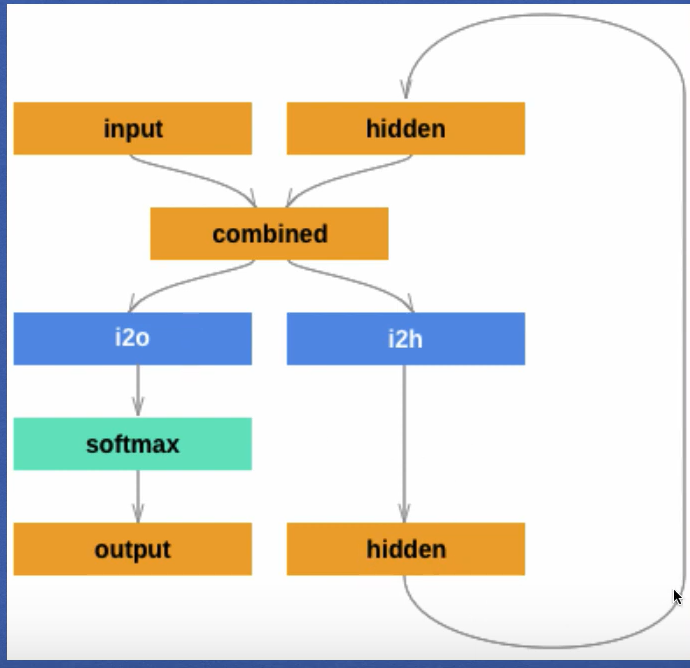

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1) 

    def forward(self, input_tensor, hidden_tensor):
        combined_tensor = torch.cat((input_tensor, hidden_tensor), 1)

        hidden = self.i2h(combined_tensor)
        output = self.i2o(combined_tensor)
        output = self.softmax(output)

        return output, hidden

    def init_hidden(self):
        # init value of hidden input
        return torch.zeros(1, self.hidden_size)


category_lines, all_categories = load_data()
n_categories = len(all_categories)

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

category_from_output(output)

In [ ]:
criterion = nn.NLLLoss()

learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)

    output, loss = train(line_tensor, category_tensor)
    current_loss += loss

    if ((i+1)%plot_steps == 0):
        all_losses.append(current_loss / plot_steps)
        current_loss = 0

    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")
        
plt.figure()
plt.plot(all_losses)
plt.show()

# RNN, LSTM & GRU

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# hyper param
input_size = 28 # 1 row at a time
seq_length = 28
hidden_size = 128
num_layers = 2
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root = "./data",
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = "./data",
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          download = True)

In [ ]:
# data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                      batch_size = batch_size,
                                      shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                     batch_size = batch_size,
                                     shuffle = True)

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # batch_first means have batch as first dimension
        # input should have this shape: (batch, seq, input_size)
        # takes whole sequence as input instead of one by one
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        # do computation based on last hidden
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # set initial hidden states
        # (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # out contains output for from rnn for each timestamp
        out, _ = self.rnn(x, h0)
        # out: (batch_size, seq_length, hidden_size)
        # only want last timestamp output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(GRU, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # batch_first means have batch as first dimension
        # input should have this shape: (batch, seq, input_size)
        # takes whole sequence as input instead of one by one
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first = True)
        # do computation based on last hidden
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # set initial hidden states
        # (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # out contains output for from rnn for each timestamp
        out, _ = self.gru(x, h0)
        # out: (batch_size, seq_length, hidden_size)
        # only want last timestamp output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # batch_first means have batch as first dimension
        # input should have this shape: (batch, seq, input_size)
        # takes whole sequence as input instead of one by one
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
        # do computation based on last hidden
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # set initial hidden states
        # (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # init cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # out contains output for from rnn for each timestamp
        out, _ = self.lstm(x, (h0, c0))
        # out: (batch_size, seq_length, hidden_size)
        # only want last timestamp output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [ ]:
model = LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [batch, 1, 28, 28]
        # resized = [batch_size, seq_size, input_size]
        images = images.reshape(-1, seq_length, input_size).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if ((i+1) % 100 == 0):
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# test model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, seq_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100 * n_correct / n_samples
    print(f"Accuracy of the network: {acc}%")

# Pytorch Lighting

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch.nn.functional as F
from pytorch_lightning import Trainer

In [ ]:
# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
class LitNeuralNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LitNeuralNet, self).__init__()
        # save hyperparam passed to init
        self.save_hyperparameters()
        
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

    def training_step(self, batch, batch_idx):
        images, labels = batch
        # flatten image
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        
        # will be shown when training in console
        return loss

    def test_step(self, batch, batch_idx):
        # called when u do trainer.test()
        images, labels = batch
        # flatten image
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = self(images)
        test_loss = F.cross_entropy(outputs, labels)
        
        # shows metric in progress bar
        # self.log("test_loss", test_loss, prog_bar=True))
        # self.log_dict(values) to log dict
        # shows in tensorboard
        self.log("test_loss", test_loss)

    def validation_step(self, batch, batch_idx):
        # on on seen data
        images, labels = batch
        # flatten image
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = self(images)

        val_loss = F.cross_entropy(outputs, labels)
        self.log("val_loss", val_loss)
        
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=learning_rate)

In [ ]:
#Mnist dataset
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True,
    transform=transforms.ToTensor(), download=True   
)
# data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size,
    num_workers=4, shuffle=False
)

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size,
    num_workers=4, shuffle=False
)

In [ ]:
if __name__ == "__main__":
    # for devs testing if model works fine
    # set (fast_dev_run=True)
    # run single batch through training and validation
    # automatic checkpointing using Trainers 
    # automaitcally trains on as many GPUs are available
    trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False)
    model = LitNeuralNet(input_size, hidden_size, num_classes)

    trainer.fit(model, train_loader, test_loader)

In [ ]:
trainer.test(model, dataloaders=test_loader)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=/kaggle/working/lightning_logs

In [ ]:
!npm i localtunnel -y

In [ ]:
# create local turnnel with tensorboard port

In [ ]:
!npx localtunnel --port 6006

## Load Lightning Module

In [ ]:
!ls /kaggle/working/lightning_logs/version_0/checkpoints

In [ ]:
model = LitNeuralNet.load_from_checkpoint("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt")

# disable randomness, dropout, etc...
model.eval()

# we can access model hyperparams
print(model.input_size)

In [ ]:
# load from checkpoint but init model with different hyper params
# if not saved with hyperparams, or set ignore for some positional argument, must pass the argument when initalizing model
model = LitNeuralNet.load_from_checkpoint("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt", input_size=784)

In [ ]:
# compatible with pytorch load
checkpoint = torch.load("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt")
print(checkpoint.keys())

In [ ]:
# continue training after loading model
model = LitNeuralNet.load_from_checkpoint("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt", input_size=784)
trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False)
trainer.fit(model, ckpt_path="/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt", train_dataloaders=train_loader)

## Transfer Learning 

In [ ]:
import torchvision.models as models

In [ ]:
backbone = models.resnet50(weights="DEFAULT")
print(backbone)

In [ ]:
print(backbone.fc.in_features)

In [ ]:
# gives all layers
print(list(backbone.children()))

In [ ]:
class ImagenetTransferLearning(LightningModule):
    def __init__(self):
        super().__init__()

        # init a pretrained resnet
        backbone = models.resnet50(weights="DEFAULT")
        num_filters = backbone.fc.in_features
        # get all layers except last one
        layers = list(backbone.children())[:-1]
        self.feature_extractor = nn.Sequential(*layers)
        # set to eval mode cause these layers wont be training
        self.feature_extractor.eval()

        # use the pretrained model to classify cifar-10 (10 image classes)
        num_target_classes = 10
        self.classifier = nn.Linear(num_filters, num_target_classes)

    def forward(self, x):
        with torch.no_grad():
            representations = self.feature_extractor(x).flatten(1)
        x = self.classifier(representations)